In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import struct
import sys
import time
from model.RadixSpline import *
from model.RS_Meta import *

In [2]:
# Real World Data
# 'd' for double, 'l' for uint
datafile = open('./data/latilong_china.double','rb')
data = datafile.read(8)
data_len, = struct.unpack('d', data)
data_len = int(data_len)
data=[]
for i in tqdm(range(data_len)):
    data_bin = datafile.read(8)
    data_unix, = struct.unpack('d',data_bin)
    data.append(data_unix)

100%|██████████| 1785607/1785607 [00:01<00:00, 1270423.64it/s]


In [3]:
epsilon_list = list(range(25,400,25))
RS_Index_seg_num = []
RS_Index_mae = []
starttime = time.perf_counter()
for i in range(len(epsilon_list)):
    epsilon = epsilon_list[i]
    RS_Index = RadixSpline(epsilon)
    RS_Index.learn_index(data)
    RS_Index_seg_num.append(RS_Index.seg_num)
    RS_Index_mae.append(RS_Index.mae)
endtime = time.perf_counter()
avg_time = (endtime - starttime) / len(epsilon_list)
avg_time

  2%|▏         | 34462/1785607 [00:00<00:05, 344351.86it/s]

25 5872 10.856247763365623


  2%|▏         | 34459/1785607 [00:00<00:05, 344582.11it/s]

50 3097 23.10663096638846


  2%|▏         | 35608/1785607 [00:00<00:04, 356071.85it/s]

75 2142 35.513116268025385


  2%|▏         | 34850/1785607 [00:00<00:05, 348499.50it/s]

100 1697 47.41049290241358


  2%|▏         | 31422/1785607 [00:00<00:05, 313778.17it/s]

125 1415 59.91084656366154


  1%|          | 18900/1785607 [00:00<00:09, 188991.62it/s]

150 1224 72.15197745080525


  2%|▏         | 35737/1785607 [00:00<00:04, 357357.56it/s]

175 1084 84.47139880164


  2%|▏         | 36017/1785607 [00:00<00:04, 360164.33it/s]

200 974 96.90234749303738


  2%|▏         | 35910/1785607 [00:00<00:04, 359098.63it/s]

225 895 110.52542524754887


  2%|▏         | 35645/1785607 [00:00<00:04, 356440.99it/s]

250 823 123.68663485302197


  2%|▏         | 35310/1785607 [00:00<00:04, 353099.49it/s]

275 756 136.14858756714102


  2%|▏         | 35577/1785607 [00:00<00:04, 355766.10it/s]

300 694 149.1300644542724


  2%|▏         | 35920/1785607 [00:00<00:04, 359195.20it/s]

325 653 160.58862896482822


  2%|▏         | 35301/1785607 [00:00<00:04, 353006.13it/s]

350 614 172.55910175083318


100%|██████████| 1785607/1785607 [00:05<00:00, 352668.88it/s]

375 578 184.3371503359922


5.02809076483051

In [4]:
epsilon_list = list(range(25,400,25))
RS_Meta_Index_seg_num_withBound = []
RS_Meta_Index_mae_withBound = []
RS_Meta_Index_mean_epsilon=[]
RS_Meta_Index_mean_seg_err=[]
starttime = time.perf_counter()
for i in range(len(epsilon_list)):
    RS_Meta_Index = RS_Meta(epsilon_list[i],init_epsilon=range(25,400,50),low=1,high=1000,withBound=True)
    RS_Meta_Index.learn_index_lookahead(data)
    RS_Meta_Index_seg_num_withBound.append(RS_Meta_Index.seg_num)
    RS_Meta_Index_mae_withBound.append(RS_Meta_Index.mae)
endtime = time.perf_counter()
avg_time = (endtime - starttime) / len(epsilon_list)
avg_time

  2%|▏         | 31855/1785607 [00:00<00:05, 318032.42it/s]

25 5962 10.366436175485424


  1%|          | 18226/1785607 [00:00<00:09, 182259.30it/s]

50 3061 22.136269067045546


  0%|          | 0/1785607 [00:00<?, ?it/s]

75 2138 34.10845611604345


  2%|▏         | 33173/1785607 [00:00<00:05, 331722.41it/s]

100 1639 45.78502660439839


  2%|▏         | 34325/1785607 [00:00<00:05, 343249.51it/s]

125 1361 58.42235889532243


  2%|▏         | 34588/1785607 [00:00<00:05, 345879.51it/s]

150 1178 70.01737056362346


  2%|▏         | 33796/1785607 [00:00<00:05, 337956.29it/s]

175 1049 82.11838495256795


  1%|          | 18818/1785607 [00:00<00:09, 188175.69it/s]

200 931 95.068828695228


  0%|          | 0/1785607 [00:00<?, ?it/s]

225 852 106.22369199941532


  2%|▏         | 35155/1785607 [00:00<00:04, 351541.95it/s]

250 782 119.2571898519663


  1%|          | 18666/1785607 [00:00<00:09, 183071.47it/s]

275 730 132.19739449946152


  0%|          | 0/1785607 [00:00<?, ?it/s]

300 679 143.79363544161734


  0%|          | 0/1785607 [00:00<?, ?it/s]

325 631 156.17756538812853


  0%|          | 0/1785607 [00:00<?, ?it/s]

350 601 168.62806373406914


100%|██████████| 1785607/1785607 [00:05<00:00, 346818.72it/s]

375 564 179.65818906399898


5.613563539336125

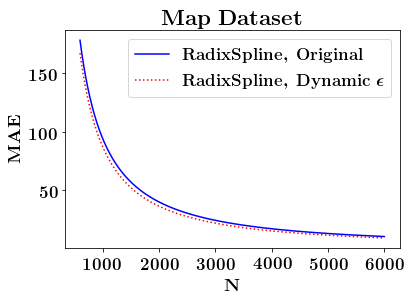

In [11]:
x = np.arange(600,6000)
import matplotlib.pylab as pylab
label_size = 18.5
ticks_size = 17
title_size = 22.5
legend_size = 17
params = {'legend.fontsize': legend_size,
          'axes.labelsize': label_size,
          'axes.titlesize': title_size,
          'xtick.labelsize': ticks_size,
          'ytick.labelsize': ticks_size}
pylab.rcParams.update(params)
plt.rcParams["text.usetex"] = True
plt.rcParams['text.latex.preamble'] = [r'\boldmath']
markers = ["v", "^", "o", "<", ">", "1", "2", "3", "4"]
colors = ["b", "r", "g", "purple", "teal", "tomato", "olive", "deeppink"]
linestyles = ['solid', 'dotted', '-.', ':', "--", (0, (3, 10, 1, 10)), (0, (3, 5, 1, 5, 1, 5)),
              (0, (5, 10))]

plt.title('$\mathrm{Map~Dataset}$')
plt.xlabel('$\mathrm{N}$')
plt.ylabel('$\mathrm{MAE}$')
plt.xticks()
plt.yticks()
def func(x,a,b):
    return a * x**b
p1,_ = curve_fit(func,RS_Index_seg_num,RS_Index_mae)
p2,_ = curve_fit(func,RS_Meta_Index_seg_num_withBound,RS_Meta_Index_mae_withBound)
#p3,_ = curve_fit(func,PGM_Index_seg_num,PGM_Index_mae)
#p4,_ = curve_fit(func,RS_Meta_Index_seg_num_withBound,RS_Meta_Index_mae_withBound)
plt.plot(x,p1[0]*x**p1[1],c=colors[0], linestyle=linestyles[0], label='$\mathrm{RadixSpline,~Original}$')
#plt.scatter(RS_Index_seg_num, RS_Index_mae,c=colors[0],marker=markers[0])
plt.plot(x,p2[0]*x**p2[1],c=colors[1], linestyle=linestyles[1], label='$\mathrm{RadixSpline,~Dynamic~\epsilon}$')
#plt.scatter(RS_Meta_Index_seg_num_withBound, RS_Meta_Index_mae_withBound,c=colors[1],marker=markers[1])
plt.legend()
#plt.savefig("{}.pdf".format("results/RadixSpline/Map_tradeoff_30"), bbox_inches='tight', pad_inches=0)

In [10]:
def calc_AUC(x,y):
    area=0
    for i in range(len(x)-1):
        area += (y[i]+y[i+1])*(x[i+1]-x[i]) / 2 
    return area
AUC1 = calc_AUC(x,p1[0]*x**p1[1])
AUC2 = calc_AUC(x,p2[0]*x**p2[1])
#AUC3 = calc_AUC(x,p3[0]*x**p3[1])
AUC1,AUC2,1-AUC2/AUC1

(188148.11505140417, 171664.22969134274, 0.08761121712836639)

In [16]:
epsilon_list = list(range(25,400,25))
RS_Meta_Index_seg_num_withBound_list = []
RS_Meta_Index_mae_withBound_list = []
look_list = list(np.arange(0.1,0.8,0.1))
for lookn in look_list:    
    RS_Meta_Index_seg_num_withBound = []
    RS_Meta_Index_mae_withBound = []
    for i in range(len(epsilon_list)):
        RS_Meta_Index = RS_Meta(epsilon_list[i],init_epsilon=range(25,400,25),low=1,high=1000,withBound=True)
        RS_Meta_Index.learn_index_lookahead(data,lookn=lookn)
        RS_Meta_Index_seg_num_withBound.append(RS_Meta_Index.seg_num)
        RS_Meta_Index_mae_withBound.append(RS_Meta_Index.mae)
    RS_Meta_Index_seg_num_withBound_list.append(RS_Meta_Index_seg_num_withBound)
    RS_Meta_Index_mae_withBound_list.append(RS_Meta_Index_mae_withBound)

  2%|▏         | 31860/1785607 [00:00<00:05, 318592.71it/s]

25 5923 10.514711243851531


  2%|▏         | 32925/1785607 [00:00<00:05, 328601.62it/s]

50 3071 22.073797873776257


  2%|▏         | 32461/1785607 [00:00<00:05, 324606.44it/s]

75 2149 33.805906338852836


  0%|          | 0/1785607 [00:00<?, ?it/s]

100 1719 44.932669394777236


  2%|▏         | 33477/1785607 [00:00<00:05, 334736.00it/s]

125 1435 56.053268160351074


  2%|▏         | 33425/1785607 [00:00<00:05, 334246.33it/s]

150 1252 67.150338232321


  2%|▏         | 33515/1785607 [00:00<00:05, 335147.12it/s]

175 1130 77.78922909688414


  2%|▏         | 34003/1785607 [00:00<00:05, 340029.51it/s]

200 1023 89.02762813989864


  2%|▏         | 32665/1785607 [00:00<00:05, 326645.64it/s]

225 918 100.08444635353692


  2%|▏         | 34329/1785607 [00:00<00:05, 343289.51it/s]

250 858 112.02989739623557


  2%|▏         | 34584/1785607 [00:00<00:05, 345839.51it/s]

275 792 124.94481260434127


  2%|▏         | 34444/1785607 [00:00<00:05, 344322.11it/s]

300 749 134.6804621621667


  0%|          | 0/1785607 [00:00<?, ?it/s]

325 692 143.50385443157424


  2%|▏         | 34855/1785607 [00:00<00:05, 348544.52it/s]

350 656 155.9509729744563


  2%|▏         | 42902/1785607 [00:00<00:07, 222918.06it/s]

375 624 171.27641188682617


  2%|▏         | 31173/1785607 [00:00<00:05, 311723.61it/s]

25 5762 10.811705487265675


  0%|          | 0/1785607 [00:00<?, ?it/s]

50 3045 22.534296180514524


  2%|▏         | 33043/1785607 [00:00<00:05, 330428.74it/s]

75 2124 34.30280403246627


  0%|          | 0/1785607 [00:00<?, ?it/s]

100 1660 45.638172341394274


  0%|          | 0/1785607 [00:00<?, ?it/s]

125 1387 57.62940109441775


  2%|▏         | 34165/1785607 [00:00<00:05, 340609.24it/s]

150 1201 69.07479137346571


  2%|▏         | 34042/1785607 [00:00<00:05, 340413.83it/s]

175 1077 80.43216340437733


  0%|          | 0/1785607 [00:00<?, ?it/s]

200 982 91.66768667461541


  2%|▏         | 34296/1785607 [00:00<00:05, 342958.69it/s]

225 879 103.0325793973702


  2%|▏         | 34459/1785607 [00:00<00:05, 344581.29it/s]

250 829 116.48307382307529


  1%|          | 21841/1785607 [00:00<00:08, 218406.04it/s]

275 770 127.30118385512601


  2%|▏         | 34827/1785607 [00:00<00:05, 348263.69it/s]

300 721 138.69412978331738


  0%|          | 0/1785607 [00:00<?, ?it/s]

325 671 152.97666507803788


  2%|▏         | 34760/1785607 [00:00<00:05, 347591.22it/s]

350 635 164.036808771471


  2%|▏         | 30092/1785607 [00:00<00:05, 300918.85it/s]

375 603 174.56716175507825


  2%|▏         | 31331/1785607 [00:00<00:05, 313307.31it/s]

25 5656 11.012207053399768


  2%|▏         | 32612/1785607 [00:00<00:05, 326116.42it/s]

50 3006 23.054311503035102


  2%|▏         | 33410/1785607 [00:00<00:05, 334097.13it/s]

75 2116 34.85587030068766


  0%|          | 0/1785607 [00:00<?, ?it/s]

100 1644 46.40371033491692


  2%|▏         | 33663/1785607 [00:00<00:05, 336622.30it/s]

125 1369 58.34509161310412


  2%|▏         | 33695/1785607 [00:00<00:05, 336948.71it/s]

150 1192 69.53310386888045


  2%|▏         | 34225/1785607 [00:00<00:05, 342247.88it/s]

175 1064 81.09226274314561


  0%|          | 0/1785607 [00:00<?, ?it/s]

200 958 93.09185391858342


  0%|          | 0/1785607 [00:00<?, ?it/s]

225 869 104.10088222100384


  0%|          | 0/1785607 [00:00<?, ?it/s]

250 801 117.4799533155952


  0%|          | 0/1785607 [00:00<?, ?it/s]

275 746 132.86444721598875


  2%|▏         | 33813/1785607 [00:00<00:05, 338126.29it/s]

300 696 144.3219504627838


  2%|▏         | 34798/1785607 [00:00<00:05, 347974.52it/s]

325 654 156.2987471487287


  2%|▏         | 34893/1785607 [00:00<00:05, 348926.17it/s]

350 619 166.2132451317675


  2%|▏         | 30167/1785607 [00:00<00:05, 301669.57it/s]

375 586 177.93541803991585


  1%|▏         | 26087/1785607 [00:00<00:06, 260867.76it/s]

25 5601 11.159968010878094


  2%|▏         | 33208/1785607 [00:00<00:05, 332077.94it/s]

50 2970 23.358903722935676


  2%|▏         | 33377/1785607 [00:00<00:05, 333126.99it/s]

75 2087 35.4745097885481


  0%|          | 0/1785607 [00:00<?, ?it/s]

100 1638 47.09399044694605


  0%|          | 0/1785607 [00:00<?, ?it/s]

125 1372 59.24018051004504


  2%|▏         | 33517/1785607 [00:00<00:05, 334869.33it/s]

150 1178 70.37421616290706


  2%|▏         | 33815/1785607 [00:00<00:05, 338141.45it/s]

175 1061 82.17214818266281


  2%|▏         | 34310/1785607 [00:00<00:05, 343091.33it/s]

200 942 94.31310025106309


  2%|▏         | 34390/1785607 [00:00<00:05, 343897.87it/s]

225 863 105.98419753058764


  0%|          | 0/1785607 [00:00<?, ?it/s]

250 789 122.60532020763807


  2%|▏         | 34865/1785607 [00:00<00:05, 348647.84it/s]

275 736 134.72716224790784


  2%|▏         | 34694/1785607 [00:00<00:05, 346931.23it/s]

300 685 146.3194493525171


  2%|▏         | 34593/1785607 [00:00<00:05, 345925.38it/s]

325 641 156.7939725818727


  1%|          | 19071/1785607 [00:00<00:09, 190704.27it/s]

350 604 169.60836007027302


  0%|          | 0/1785607 [00:00<?, ?it/s]

375 575 179.82056465952473


  0%|          | 0/1785607 [00:00<?, ?it/s]

25 5543 11.31255309819014


  0%|          | 0/1785607 [00:00<?, ?it/s]

50 2927 23.626119297247378


  2%|▏         | 33289/1785607 [00:00<00:05, 332884.76it/s]

75 2062 36.12343477596134


  0%|          | 0/1785607 [00:00<?, ?it/s]

100 1625 47.88436033236877


  2%|▏         | 33476/1785607 [00:00<00:05, 334756.33it/s]

125 1360 59.93250530491872


  2%|▏         | 34082/1785607 [00:00<00:05, 340813.82it/s]

150 1173 71.34460382379774


  2%|▏         | 34379/1785607 [00:00<00:05, 343782.13it/s]

175 1050 83.20818970803766


  2%|▏         | 34230/1785607 [00:00<00:05, 342292.98it/s]

200 937 95.27359827778453


  0%|          | 0/1785607 [00:00<?, ?it/s]

225 855 106.40055790551897


  2%|▏         | 34368/1785607 [00:00<00:05, 343678.69it/s]

250 792 123.21401573806554


  2%|▏         | 33478/1785607 [00:00<00:05, 334773.93it/s]

275 730 135.41290048706125


  1%|          | 21367/1785607 [00:00<00:08, 210657.72it/s]

300 679 147.7142915546366


  0%|          | 0/1785607 [00:00<?, ?it/s]

325 633 158.038050366066


  0%|          | 0/1785607 [00:00<?, ?it/s]

350 599 170.03868488418783


  2%|▏         | 29415/1785607 [00:00<00:05, 293551.88it/s]

375 572 180.73121857161178


  2%|▏         | 32386/1785607 [00:00<00:05, 323858.76it/s]

25 5488 11.468046440230129


  2%|▏         | 33228/1785607 [00:00<00:05, 332274.77it/s]

50 2899 23.948232729822408


  0%|          | 0/1785607 [00:00<?, ?it/s]

75 2045 36.29045529055386


  2%|▏         | 33538/1785607 [00:00<00:05, 335379.52it/s]

100 1603 48.57202620733454


  0%|          | 0/1785607 [00:00<?, ?it/s]

125 1355 60.45817304703667


  0%|          | 0/1785607 [00:00<?, ?it/s]

150 1166 72.33557944161285


  0%|          | 0/1785607 [00:00<?, ?it/s]

175 1051 84.21118812818274


  2%|▏         | 34253/1785607 [00:00<00:05, 342526.24it/s]

200 936 96.11780867794538


  0%|          | 0/1785607 [00:00<?, ?it/s]

225 853 107.44662683334015


  2%|▏         | 34628/1785607 [00:00<00:05, 346278.68it/s]

250 779 124.22474710280594


  0%|          | 0/1785607 [00:00<?, ?it/s]

275 727 137.03390163681033


  0%|          | 0/1785607 [00:00<?, ?it/s]

300 668 147.9524273818371


  2%|▏         | 29169/1785607 [00:00<00:06, 291689.58it/s]

325 629 160.03619329449313


  2%|▏         | 34532/1785607 [00:00<00:05, 345312.92it/s]

350 599 171.04281401226586


  2%|▏         | 29822/1785607 [00:00<00:05, 298172.65it/s]

375 575 182.70081546499313


  2%|▏         | 32446/1785607 [00:00<00:05, 324456.44it/s]

25 5437 11.587920522264978


  1%|          | 20625/1785607 [00:00<00:08, 204358.29it/s]

50 2874 24.140304669504545


  2%|▏         | 32991/1785607 [00:00<00:05, 329907.95it/s]

75 2026 36.8871033771709


  0%|          | 0/1785607 [00:00<?, ?it/s]

100 1595 48.951330835956625


  2%|▏         | 34143/1785607 [00:00<00:05, 340705.75it/s]

125 1343 61.03600904342333


  0%|          | 0/1785607 [00:00<?, ?it/s]

150 1157 72.59720476006198


  0%|          | 0/1785607 [00:00<?, ?it/s]

175 1047 85.27060937821145


  0%|          | 0/1785607 [00:00<?, ?it/s]

200 936 96.58689734079223


  0%|          | 0/1785607 [00:00<?, ?it/s]

225 852 108.51255959458044


  2%|▏         | 34588/1785607 [00:00<00:05, 345875.38it/s]

250 778 125.12408553505895


  2%|▏         | 32396/1785607 [00:00<00:05, 322769.82it/s]

275 723 137.9067219158527


  2%|▏         | 34735/1785607 [00:00<00:05, 347347.85it/s]

300 670 149.3298816592901


  2%|▏         | 34369/1785607 [00:00<00:05, 343684.59it/s]

325 633 160.69436555748268


  2%|▏         | 34649/1785607 [00:00<00:05, 346485.37it/s]

350 596 173.17670965671618


  2%|▏         | 30520/1785607 [00:00<00:05, 305198.84it/s]

375 564 182.8872445056499


  2%|▏         | 32384/1785607 [00:00<00:05, 323837.99it/s]

25 5394 11.719652756737625


  2%|▏         | 33037/1785607 [00:00<00:05, 330364.01it/s]

50 2847 24.518560355106136


  2%|▏         | 33205/1785607 [00:00<00:05, 332049.52it/s]

75 2008 37.02481957115984


  2%|▏         | 33601/1785607 [00:00<00:05, 336006.31it/s]

100 1578 49.63468389180822


  0%|          | 0/1785607 [00:00<?, ?it/s]

125 1332 61.85794914558467


  2%|▏         | 34183/1785607 [00:00<00:05, 341828.70it/s]

150 1155 73.70981128546202


  2%|▏         | 34203/1785607 [00:00<00:05, 342022.99it/s]

175 1040 85.7148991911434


  2%|▏         | 34495/1785607 [00:00<00:05, 344949.51it/s]

200 932 97.74357403392796


  2%|▏         | 33603/1785607 [00:00<00:05, 336015.90it/s]

225 848 110.39341859658929


  2%|▏         | 34260/1785607 [00:00<00:05, 342597.88it/s]

250 780 126.28319837455834


  2%|▏         | 34495/1785607 [00:00<00:05, 344945.39it/s]

275 720 138.2919785820732


  2%|▏         | 34705/1785607 [00:00<00:05, 347041.23it/s]

300 675 150.01077112712932


  2%|▏         | 34369/1785607 [00:00<00:05, 343689.51it/s]

325 630 161.1419920508824


  0%|          | 0/1785607 [00:00<?, ?it/s]

350 595 173.69029075266843


  2%|▏         | 30303/1785607 [00:00<00:05, 303026.68it/s]

375 560 183.34084319785933


  2%|▏         | 32167/1785607 [00:00<00:05, 321662.64it/s]

25 5363 11.784486731962856


  2%|▏         | 33211/1785607 [00:00<00:05, 332108.73it/s]

50 2819 24.708508087165878


  0%|          | 0/1785607 [00:00<?, ?it/s]

75 2000 37.30076719009278


  0%|          | 0/1785607 [00:00<?, ?it/s]

100 1584 49.971136425876466


  0%|          | 0/1785607 [00:00<?, ?it/s]

125 1324 62.27269998381503


  0%|          | 0/1785607 [00:00<?, ?it/s]

150 1147 74.36845957705138


  0%|          | 0/1785607 [00:00<?, ?it/s]

175 1026 86.61585388050113


  0%|          | 0/1785607 [00:00<?, ?it/s]

200 927 98.34496280536534


  0%|          | 0/1785607 [00:00<?, ?it/s]

225 846 111.17259620958028


  0%|          | 0/1785607 [00:00<?, ?it/s]

250 783 123.21732105664908


  2%|▏         | 34105/1785607 [00:00<00:05, 341044.63it/s]

275 716 139.0691624752815


  2%|▏         | 34841/1785607 [00:00<00:05, 348402.86it/s]

300 674 151.44091505017622


  2%|▏         | 34658/1785607 [00:00<00:05, 346573.72it/s]

325 630 161.4855570122653


  0%|          | 0/1785607 [00:00<?, ?it/s]

350 600 173.77218559291043


100%|██████████| 1785607/1785607 [00:04<00:00, 363422.24it/s]

375 561 184.88008391544165


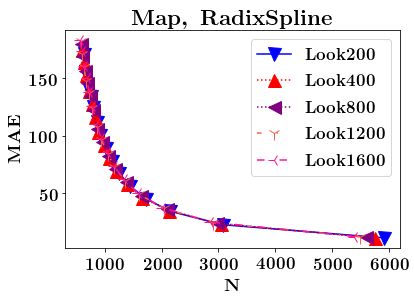

In [24]:
x = np.arange(2500,21000)
import matplotlib.pylab as pylab
label_size = 18.5
ticks_size = 17
title_size = 22.5
legend_size = 17
params = {'legend.fontsize': legend_size,
          'axes.labelsize': label_size,
          'axes.titlesize': title_size,
          'xtick.labelsize': ticks_size,
          'ytick.labelsize': ticks_size}
pylab.rcParams.update(params)
plt.rcParams["text.usetex"] = True
plt.rcParams['text.latex.preamble'] = [r'\boldmath']
markers = ["v", "^", "o", "<", ">", "1", "2", "3", "4"]
colors = ["b", "r", "g", "purple", "teal", "tomato", "olive", "deeppink"]
linestyles = ['solid', 'dotted', '-.', ':', "--", (0, (3, 10, 1, 10)), (0, (3, 5, 1, 5, 1, 5)),
              (0, (5, 10))]

plt.title('$\mathrm{Map,~RadixSpline}$')
plt.xlabel('$\mathrm{N}$')
plt.ylabel('$\mathrm{MAE}$')
def func(x,a,b):
    return a * x**b
i=0
RS_Meta_Index_seg_num_withBound = RS_Meta_Index_seg_num_withBound_list[i]
RS_Meta_Index_mae_withBound = RS_Meta_Index_mae_withBound_list[i]
p,_ = curve_fit(func,RS_Meta_Index_seg_num_withBound,RS_Meta_Index_mae_withBound)
plt.plot(RS_Meta_Index_seg_num_withBound,RS_Meta_Index_mae_withBound,linestyle=linestyles[i], label='$\mathrm{Look'+str(look_list[i])+'}$',color=colors[i],marker=markers[i],markersize=13)
for i in range(1,len(RS_Meta_Index_mae_withBound_list),2):
    RS_Meta_Index_seg_num_withBound = RS_Meta_Index_seg_num_withBound_list[i]
    RS_Meta_Index_mae_withBound = RS_Meta_Index_mae_withBound_list[i]
    p,_ = curve_fit(func,RS_Meta_Index_seg_num_withBound,RS_Meta_Index_mae_withBound)
    plt.plot(RS_Meta_Index_seg_num_withBound,RS_Meta_Index_mae_withBound,linestyle=linestyles[i], label='$\mathrm{Look'+str(look_list[i])+'}$',color=colors[i],marker=markers[i],markersize=13)
plt.legend()
#plt.savefig("{}.pdf".format("results/RadixSpline/Map_lookn_26"), bbox_inches='tight', pad_inches=0)